[![General Assembly Logo](https://camo.githubusercontent.com/1a91b05b8f4d44b5bbfb83abac2b0996d8e26c92/687474703a2f2f692e696d6775722e636f6d2f6b6538555354712e706e67)](https://generalassemb.ly/education/web-development-immersive)
![Misk Logo](https://i.ibb.co/KmXhJbm/Webp-net-resizeimage-1.png)  
<h1 style = 'color:#f2d53c'> Project 3: Sharing Dataset on Kaggle </h1>
<a href = 'https://www.kaggle.com/fahadalqahtani/tom-clancys-rainbow-six-siege' > tom-clancys-rainbow-six-siege on kaggle </a?

In [2]:
# import needed libarys 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
import warnings
import requests
import re
from bs4 import BeautifulSoup
from selenium import webdriver
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

C:\Users\sfw20\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<h1 style = 'color:#f2d53c'> The Dataset </h1>

<p> For this project I have selected a game Leaderboard website  that contains the stats  of over than  17 million player  (wins, time played….). the idea of selecting  this website is to see what is  the  important skills that top players  have in common . I am going to do Web-scrapeing on <a href ='https://r6.tracker.network/leaderboards/pvp-season/all/Mmr?region=-1&season=17'> R6Tracker website  </a>
</p>

<a href = 'https://www.ubisoft.com/en-us/game/rainbow-six/siege'>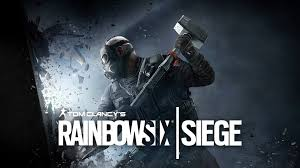

</a>

<h1 style = 'color:#f2d53c' >Web Scraping </h1>

#### So first thing I am going to take 849 leaderboard page 

<a href = 'https://www.ubisoft.com/en-us/game/rainbow-six/siege'> 
<img src = 'ldb.jpg'/>
</a>

####  I made this cell as md becaus I already saved the pages in `web_pages` file  
<h4 style="color:red;">849 web page every page contains 100 player  😨 </h4>


```python
from time import sleep
driver = webdriver.Chrome('chromedriver.exe')
driver.get('https://r6.tracker.network/leaderboards/pvp-season/psn/Mmr?region=-1&season=17')
for i in range(849):
    # create browser obj
    lst_.append(driver.page_source)
    # access search box 
    next_ = driver.find_element_by_link_text("Next")
    sleep(2)
    next_.click()
    sleep(2)
```

```PYTHON
df.to_csv('web_pages')
```

In [2]:
# reading file containg pages 
df = pd.read_csv('web_pages')

In [4]:
lst_ = df.web_pages.values.tolist() # to get the pages as list and use it in soup 

In [5]:
# I am going to get all_name form the pages 
all_names = [elem.text for soup in [BeautifulSoup(page, 'lxml') for page in lst_] for elem in soup.find_all('a', attrs={'class':'trn-lb-entry__name'})]

In [6]:
len(all_names)

84900

### getting players stat

<a href = 'https://r6.tracker.network/profile/psn/JstDiogo'> 
<img src = 'stats.jpg'/>
</a>

#### extract Stat pages 

In [43]:
# so to acess the stat for every player We need to loop into the url and change the name every time so we can have the player page 
# the total pages should be around 84900 but I did take less of that because of internet problem 
stats_pages  = []
try:
    for nm in all_names :
        for elm in [requests.get(f'https://r6.tracker.network/profile/psn/{nm}')]:
            stats_pages.append(elm.text)
except Exception as e :
    pass
        
    

In [44]:
len(stats_pages)


5098

#### extract Stat Data 

In [45]:
kills = [elem.text.strip() for soup in [BeautifulSoup(page, 'lxml') for page in stats_pages] for elem in  soup.find_all('div', attrs={'data-stat':'PVPKills'})]

In [47]:
len(kills)

5035

In [48]:
deaths = [elem.text.strip() for soup in [BeautifulSoup(page, 'lxml') for page in stats_pages] for elem in  soup.find_all('div', attrs={'data-stat':'PVPDeaths'})]

In [50]:
len(deaths)

5035

In [28]:
wins = [elem.text.strip() for soup in [BeautifulSoup(page, 'lxml') for page in stats_pages ] for elem in  soup.find_all('div', attrs={'data-stat':'PVPMatchesWon'})]

In [56]:
len(wins) # the values have been repated I am going to fix it 

10070

In [64]:
single_wins = []
for ind , val in enumerate(wins):
    if ind == 0:
        single_wins.append(val)
    elif ind %2 == 0:
        single_wins.append(val)
        

In [66]:
len(single_wins)

5035

In [57]:
lose = [elem.text.strip() for soup in [BeautifulSoup(page, 'lxml') for page in stats_pages] for elem in  soup.find_all('div', attrs={'data-stat':'PVPMatchesLost'})]

In [67]:
len(lose)

5035

In [68]:
timeplayed = [elem.text.strip() for soup in [BeautifulSoup(page, 'lxml') for page in stats_pages] for elem in  soup.find_all('div', attrs={'data-stat':'PVPTimePlayed'})]

In [69]:
len(timeplayed)

5035

In [70]:
xp = [elem.text.strip() for soup in [BeautifulSoup(page, 'lxml') for page in stats_pages] for elem in  soup.find_all('div', attrs={'data-stat':'PVPTotalXp'})]

In [71]:
len(xp)

5035

In [72]:
headshot = [elem.text.strip() for soup in [BeautifulSoup(page, 'lxml') for page in stats_pages] for elem in  soup.find_all('div', attrs={'data-stat':'PVPHeadshots'})]

In [73]:
len(headshot)

5035

In [74]:
mele = [elem.text.strip() for soup in [BeautifulSoup(page, 'lxml') for page in stats_pages] for elem in  soup.find_all('div', attrs={'data-stat':'PVPMeleeKills'})]

In [75]:
len(mele)

5035

In [76]:
matchplayed = [elem.text.strip() for soup in [BeautifulSoup(page, 'lxml') for page in stats_pages] for elem in  soup.find_all('div', attrs={'data-stat':'PVPMatchesPlayed'})]

In [77]:
len(matchplayed)

5035

In [103]:
# make it as datafarme 
df = pd.DataFrame(data=  list(zip(all_names[0:5035], kills, deaths,
single_wins,
lose,
xp,
headshot,
mele,
matchplayed ,timeplayed)) ,columns= ['player_name' ,'kills', 'deaths', 'wins', 'losess', 'xp', 'headshots', 'melee_kills', 'games_played' ,'time_played'])

```python
# save it
df.to_csv('Ra6s.csv')
```

#### data  description 

---
|Feature|Type|Description|
|---|---|---|
|player_name|object|unique name for every player in playstion network|
|kills|int|The number of kills the player have | 
|deaths|int|The number of deaths the player have| 
|wins|int|The number of wins the player have| 
|losess|int|The number of losess the player have| 
|xp|float|The number of points the player earned |
|headshots|int|the number of kills in the head player did|
|melee|int|The number  melee killd|
|games_played|int|The Number of games player played|
|time_played|int|The amount of time spent |




---

<h1 style = 'color:#f2d53c' >Cleaning </h1>

In [105]:
rs = pd.read_csv('Ra6s.csv')

In [109]:
rs.head()

,Unnamed: 0,player_name,kills,deaths,wins,losess,xp,headshots,melee_kills,games_played,time_played
0,0,imBrendyn,"39,693","27,208","3,963","2,524","87,180,363","16,789",336,"6,487","2,105h"
1,1,bestboy021,"52,978","31,853","6,332","2,716","111,206,504","18,196","1,204","9,048","2,440h"
2,2,ATKAbdul,"32,141","31,353","4,525","2,892","89,109,230","12,652",564,"7,417","2,184h"
3,3,BugglyJR,"44,525","33,800","4,723","3,030","111,741,958","18,692",788,"7,753","2,481h"
4,4,Rozhiin,"16,972","18,249","2,730","1,965","46,063,186","5,785",409,"4,695","1,337h"


In [110]:
rs.shape

(5035, 11)

In [111]:
# drop unnamed col 
rs.drop('Unnamed: 0', axis = 1 , inplace=True)

In [113]:
rs.head()

,player_name,kills,deaths,wins,losess,xp,headshots,melee_kills,games_played,time_played
0,imBrendyn,"39,693","27,208","3,963","2,524","87,180,363","16,789",336,"6,487","2,105h"
1,bestboy021,"52,978","31,853","6,332","2,716","111,206,504","18,196","1,204","9,048","2,440h"
2,ATKAbdul,"32,141","31,353","4,525","2,892","89,109,230","12,652",564,"7,417","2,184h"
3,BugglyJR,"44,525","33,800","4,723","3,030","111,741,958","18,692",788,"7,753","2,481h"
4,Rozhiin,"16,972","18,249","2,730","1,965","46,063,186","5,785",409,"4,695","1,337h"


In [136]:
# we need to remove the , and h from our data frame 
rs.iloc[:, 1:] = rs.iloc[:, 1:].apply(lambda x: x.str.replace(',','').str.replace('h',''))

```python
rs.to_csv('rs6_clean.csv')
```

In [3]:
df = pd.read_csv('rs6_clean.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    5035 non-null   int64 
 1   player_name   5035 non-null   object
 2   kills         5035 non-null   int64 
 3   deaths        5035 non-null   int64 
 4   wins          5035 non-null   int64 
 5   losess        5035 non-null   int64 
 6   xp            5035 non-null   int64 
 7   headshots     5035 non-null   int64 
 8   melee_kills   5035 non-null   int64 
 9   games_played  5035 non-null   int64 
 10  time_played   5035 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 432.8+ KB


In [5]:
df.drop('Unnamed: 0', axis = 1 , inplace=True)

In [25]:
df.shape

(5035, 10)

<h1 style = 'color:#f2d53c' >EDA </h1>

#### Simple eda 

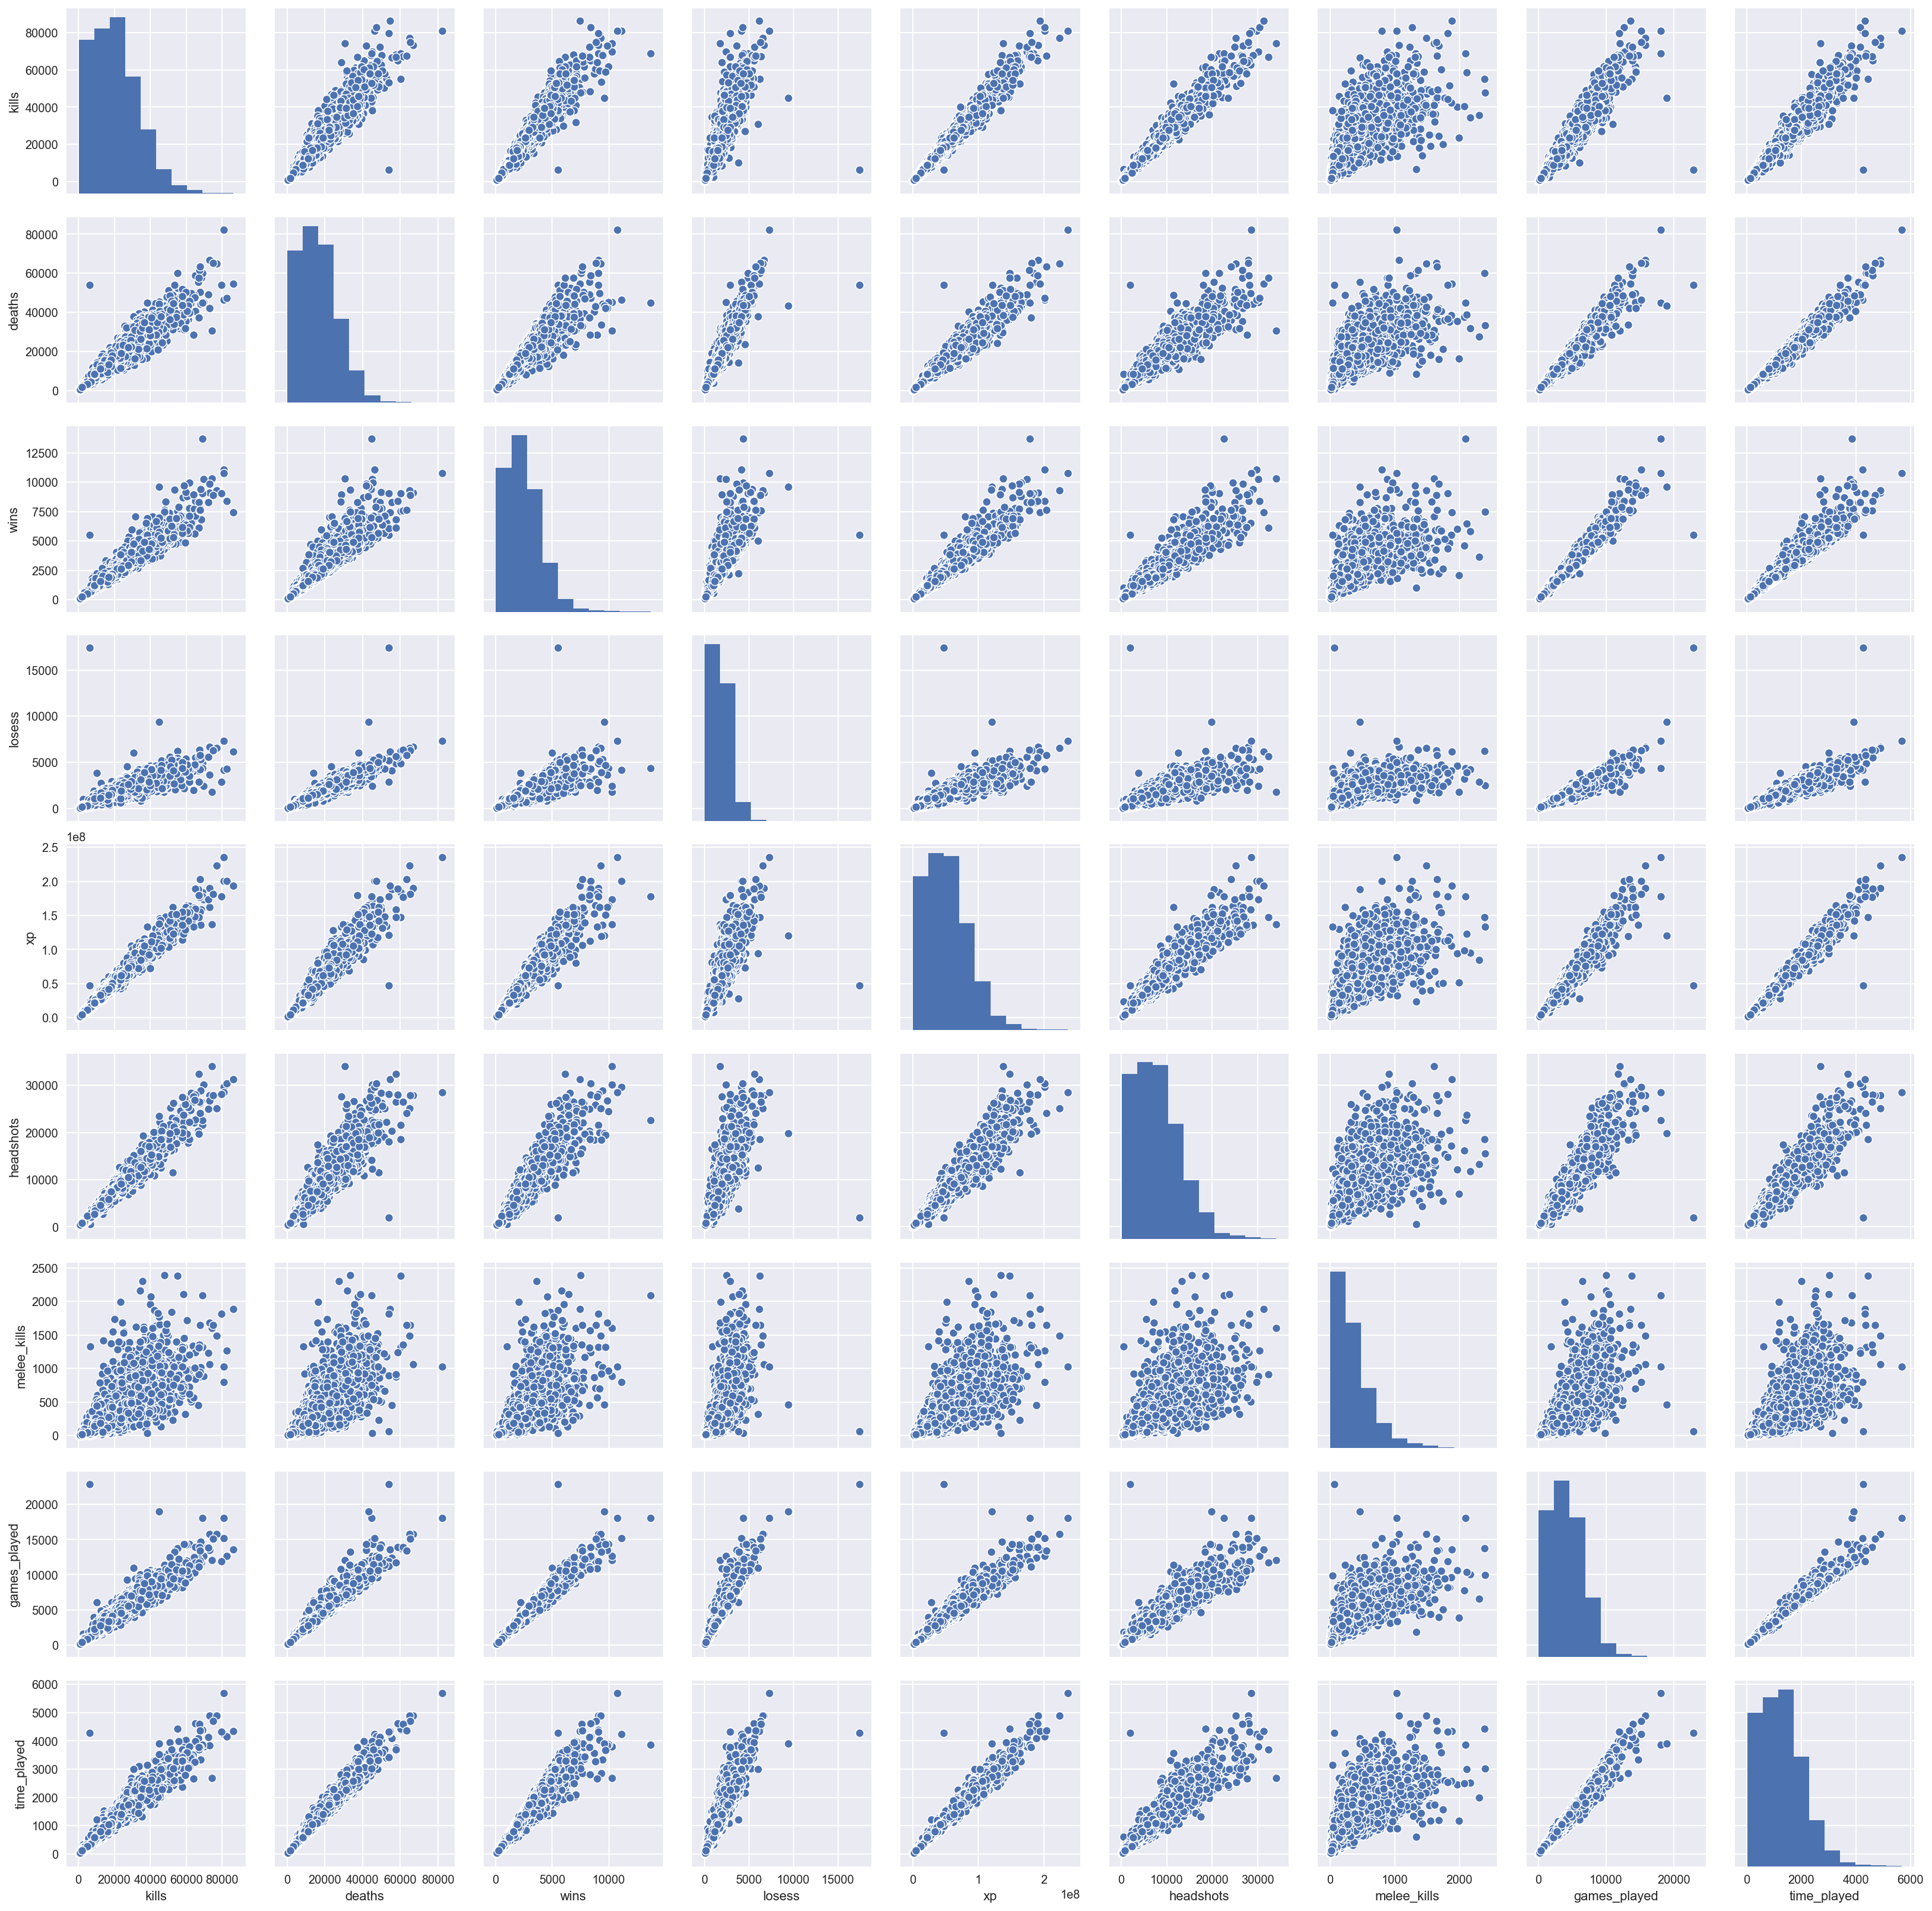

In [6]:
sns.pairplot(data = df)

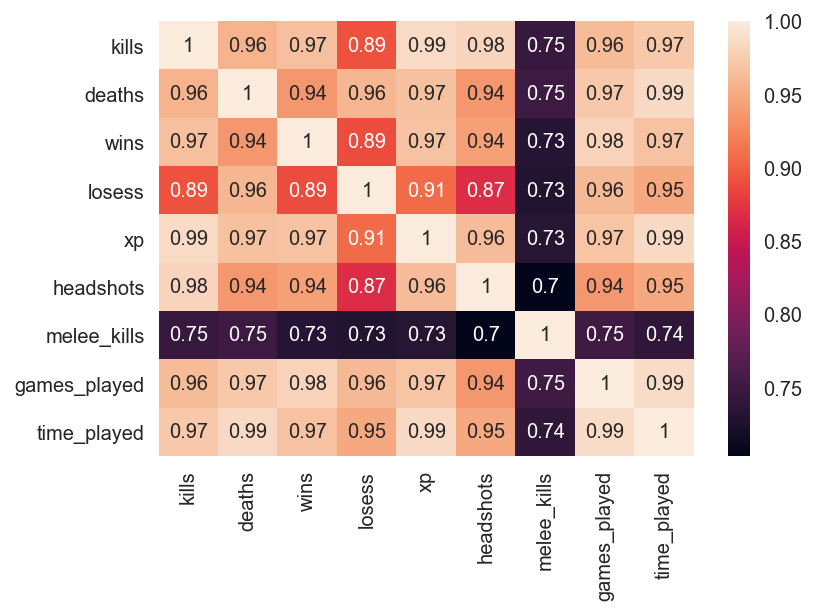

In [7]:
sns.heatmap(df.corr() ,annot=True);

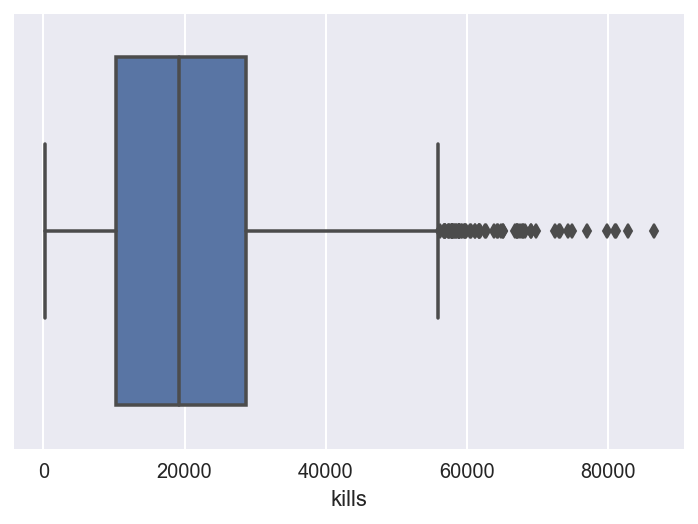

In [8]:
sns.boxplot(df.kills);

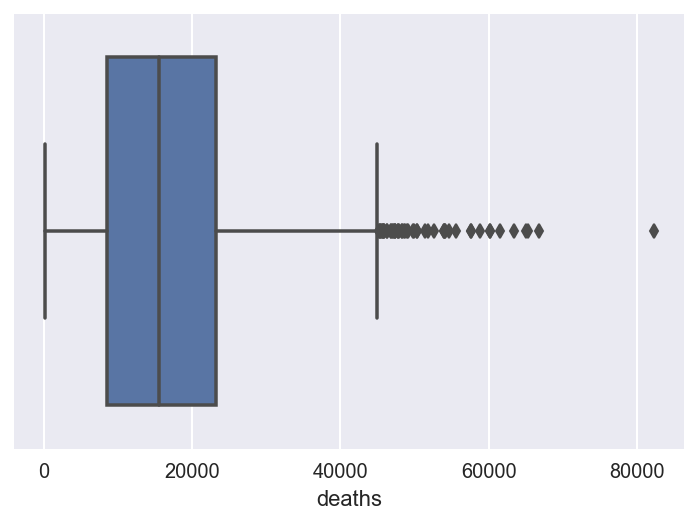

In [9]:
sns.boxplot(df.deaths);

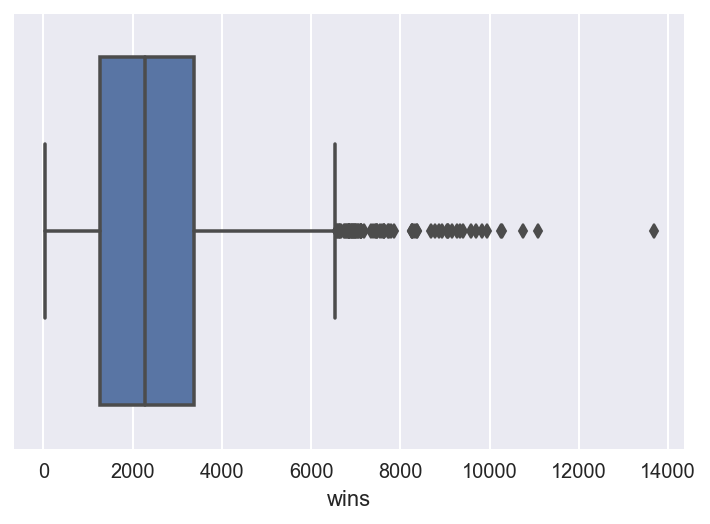

In [10]:
sns.boxplot(df.wins);

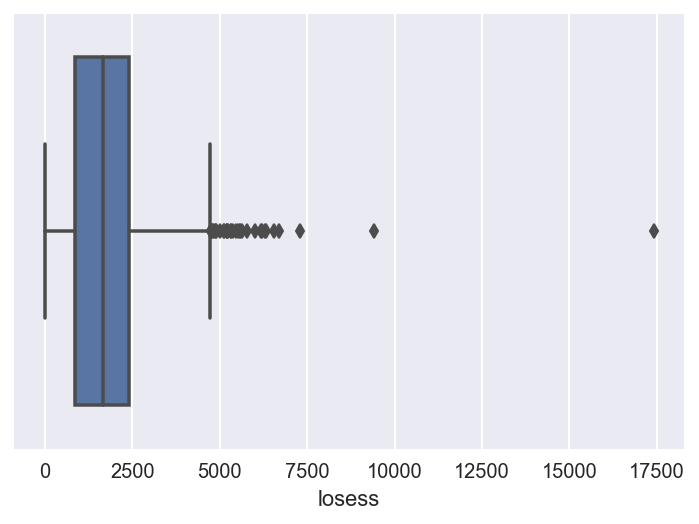

In [11]:
sns.boxplot(df.losess);

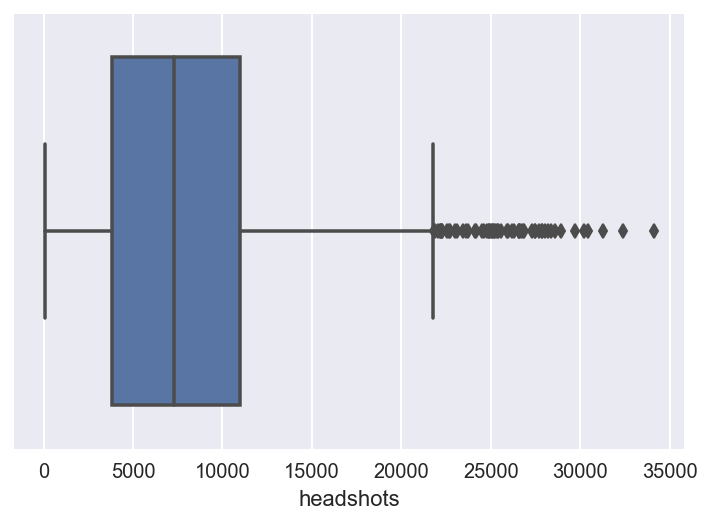

In [12]:
sns.boxplot(df.headshots);

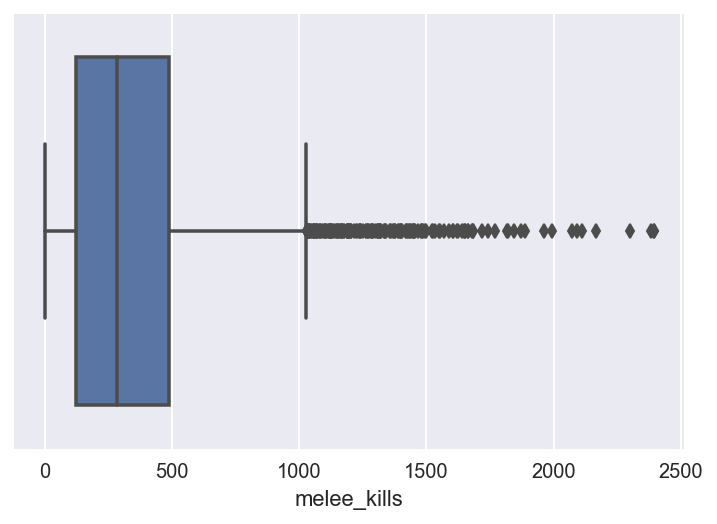

In [13]:
sns.boxplot(df.melee_kills);

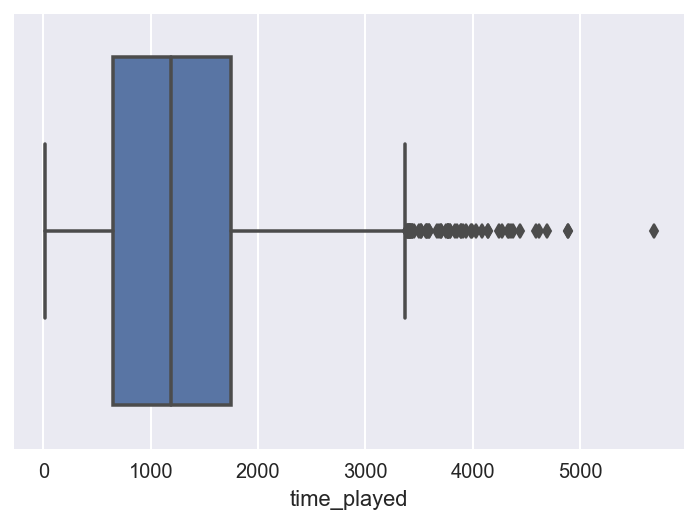

In [14]:
sns.boxplot(df.time_played);

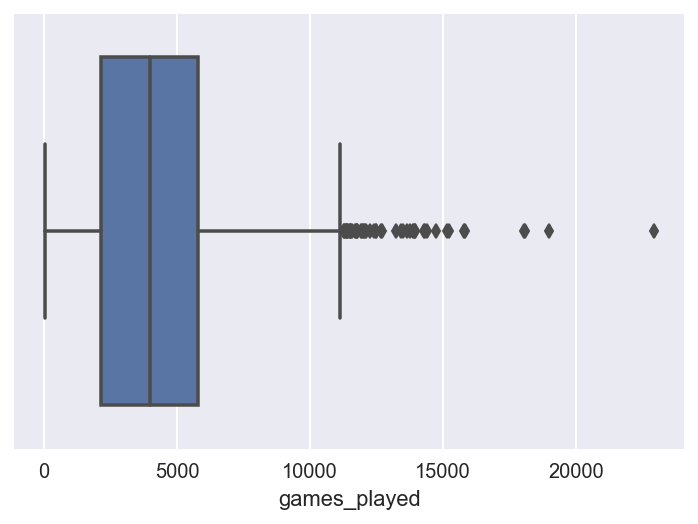

In [15]:
sns.boxplot(df.games_played);

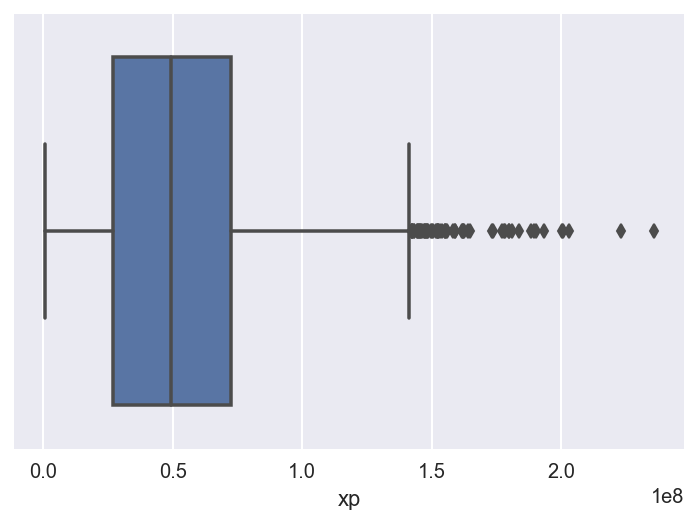

In [16]:
sns.boxplot(df.xp);

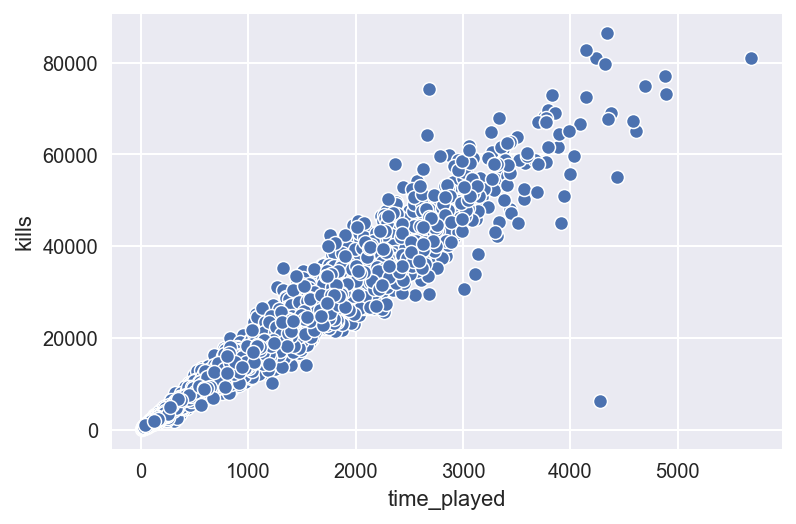

In [17]:
sns.scatterplot(x = 'time_played' , y = 'kills', data = df );

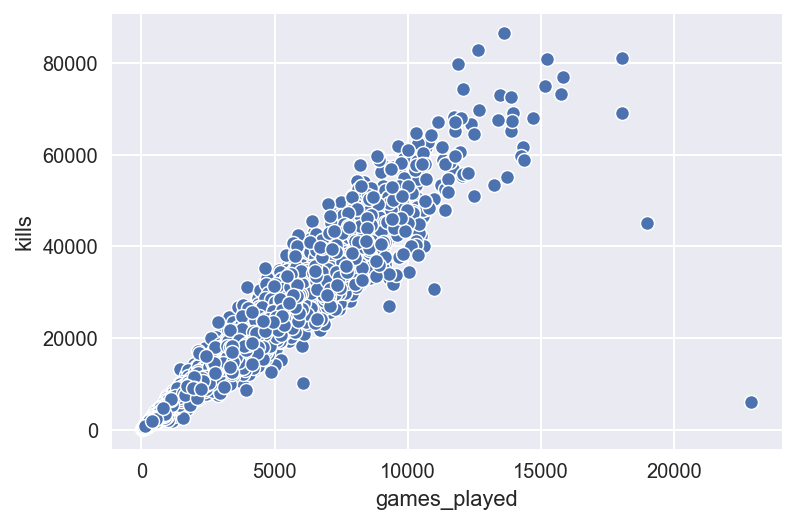

In [20]:
sns.scatterplot(x = 'games_played' , y = 'kills', data = df );

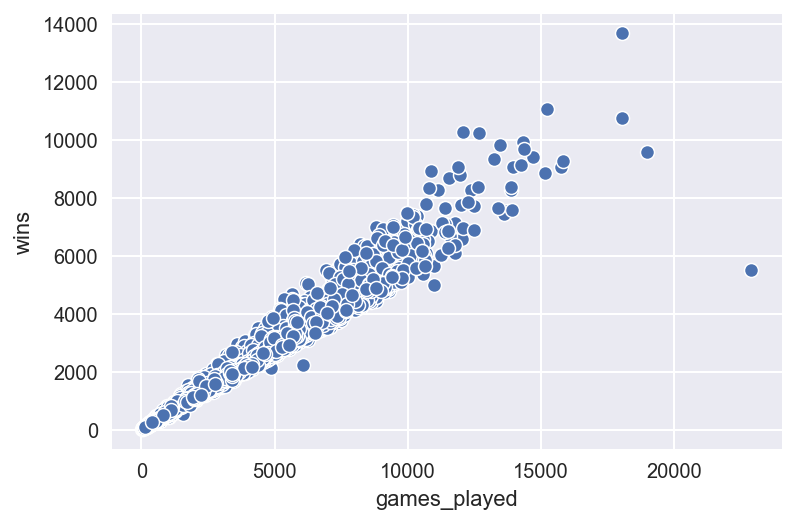

In [21]:
sns.scatterplot(x = 'games_played' , y = 'wins', data = df );

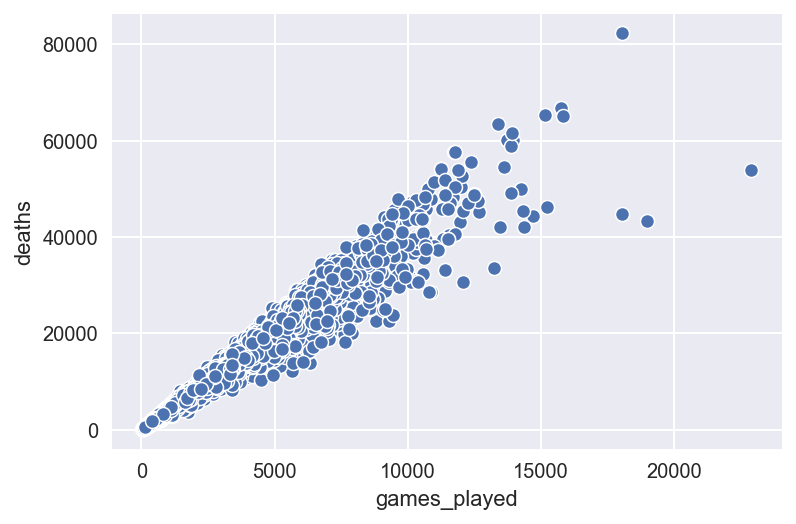

In [22]:
sns.scatterplot(x = 'games_played' , y = 'deaths', data = df );

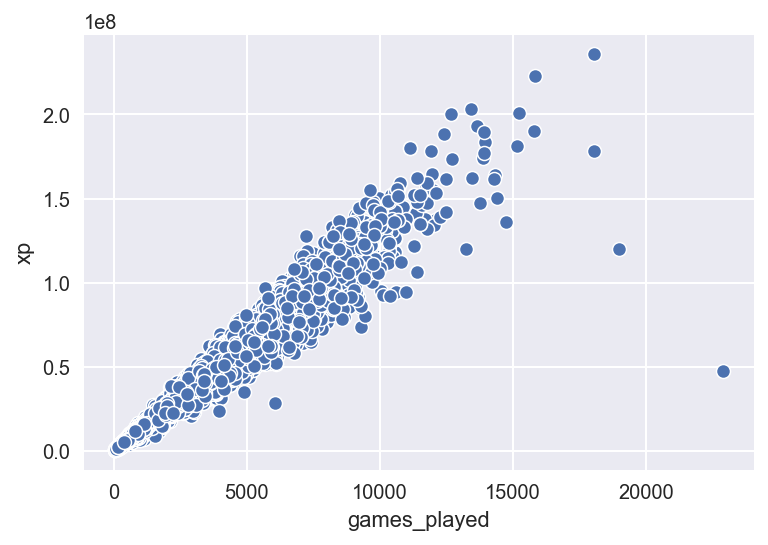

In [23]:
sns.scatterplot(x = 'games_played' , y = 'xp', data = df );

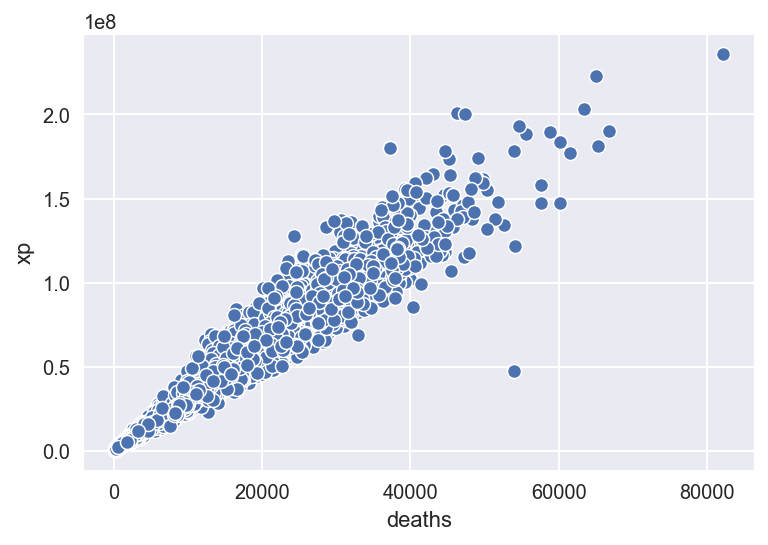

In [24]:
sns.scatterplot(x = 'deaths' , y = 'xp', data = df );

In [18]:
pd.crosstab(index = [df.time_played > 1000 ]  , columns=['sum'] , normalize=True, values=df.kills , aggfunc=sum).mul(100)

col_0,sum
time_played,
False,16.349075
True,83.650925


In [19]:
pd.crosstab(index = [df.time_played < 200 ]  , columns=['sum'] , normalize=True, values=df.kills , aggfunc=sum).mul(100)

col_0,sum
time_played,
False,99.052702
True,0.947298


In [26]:
pd.crosstab(index = [df.losess  < 100 ]  , columns=['sum'] , normalize=True, values=df.kills , aggfunc=sum).mul(100)

col_0,sum
losess,
False,99.74877
True,0.25123
